1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import seaborn as sns

-6.538658604546294 6.265522086794933


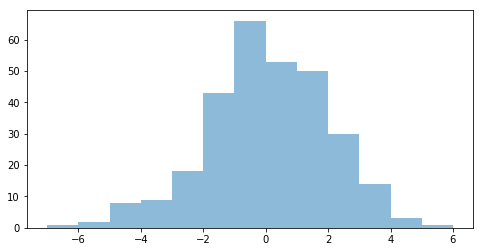

In [76]:
mean,std,N=0,2,300 # 300 is of order O(100)
x=np.random.normal(mean,std,N)
print(x.min(),x.max())
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
#plt.xticks(x) RIGHT FUNCTION BUT NEEDS TO BE FIXED
y = ax.hist(x, bins=np.arange(int(x.min()-1),int(x.max())+1,0.5*int(std/(2*0.5))),label='x', alpha=0.5)
# BASICALLY THIS GIVES A DIFFERENT BIN WIDTH DEPENDING ON STD
# std=1.0 -> width=0.5 std=1.5 -> width=0.5 std=2.0 -> width=1.0

In [57]:
int(1.8)

1

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [2]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
# saves the file in the current directory hence LaboratoryOfComputationalPhysics

--2018-11-27 14:59:33--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2018-11-27 14:59:33--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc42a30e0d6a784bd3cf9f943e6c.dl.dropboxusercontent.com/cd/0/inline/AWbLF3axlib7w534zWcV1YN7NkouPS1N0Q3ERnuE9JnUrQVFQYx9oF-uxq8xOUSrRXePboQ1Q1iVhB1QZ-Q_GKFqkbERCeTek0pQyfUkKLeWWKLXCb4d5Ukqwm4bMQjc87FQrGtSlh1tvdkYH-UMFYMblgrgigVS8F4X-jrh_s0I_d9B4wMCXO_NPwPHpvziZRE/file [following]
--2018-11-27 14:59:33--  https://uc42a30e0d6a784bd3cf9f943e6c.dl.dropboxusercontent.com/cd/

In [9]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should you the `np.load()` function to load the file as a numpy array and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [7]:
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
# saves the file in the current directory hence LaboratoryOfComputationalPhysics

--2018-11-27 15:03:45--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2018-11-27 15:03:45--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfd918e9d3b6c5ea5a0d97b806e.dl.dropboxusercontent.com/cd/0/inline/AWau_vD2JOZI5N9JxUJNAVfHpCKDLOKSH1V7esNu2PIUr3_ONvPQPD-y7ZbRVkxcpZ8xRHcZZikORIilacpROIy_k_Sx1wKwVfkQhqWdKhuvJ6Xz6A5JUS85zgzqopLJwaS18dqDxHZMx4eXJMeDOaRCQvrG4AOun3M78MPShd1cv8WWAjY3TKphoU6Pybeacvw/file [following]
--2018-11-27 15:03:46--  https://ucfd918e9d3b6c5ea5a0d97b806e.dl.dropboxusercontent.com/cd/0/inline/AWau_vD2JOZI5N9JxUJNAVfHpCKDLOKSH